In [2]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv("./data/data10.csv")

In [15]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
data.head()

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
0,347b3eedbc5b8a6d8664aa703783ce14,2024-02-13 00:00:03,900,GET,/products/a5b557d3325970ec192ab54ad3b4f2eda409...,NaN,HTTP/2.0,200,4152,[],Mozilla/5.0 (Linux; Android 13; SM-S901N Build...
1,347b3eedbc5b8a6d8664aa703783ce14,2024-02-13 00:00:03,900,GET,/stream/?path=discount,NaN,HTTP/2.0,499,0,[],Mozilla/5.0 (Linux; Android 13; SM-S901N Build...
2,347b3eedbc5b8a6d8664aa703783ce14,2024-02-13 00:00:04,900,GET,/comments/a5b557d3325970ec192ab54ad3b4f2eda409...,NaN,HTTP/2.0,200,1730,[],Mozilla/5.0 (Linux; Android 13; SM-S901N Build...
3,347b3eedbc5b8a6d8664aa703783ce14,2024-02-13 00:00:04,900,GET,/spec/a5b557d3325970ec192ab54ad3b4f2eda40903f5...,NaN,HTTP/2.0,200,1931,[],Mozilla/5.0 (Linux; Android 13; SM-S901N Build...
4,347b3eedbc5b8a6d8664aa703783ce14,2024-02-13 00:00:04,900,GET,/banners/price/?cidx=0&lowest=false&limit=1000...,NaN,HTTP/2.0,200,7876,[],Mozilla/5.0 (Linux; Android 13; SM-S901N Build...


In [18]:
data['local_time'] = pd.to_datetime(data['local_time'], format='%d/%b/%Y:%H:%M:%S')

In [21]:
data.sort_values(['hashed_ip', 'local_time'], inplace=True)

In [30]:
data

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
706166,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:42,900,GET,/,NaN,HTTP/2.0,200,17285,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706167,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:43,900,GET,/stream/?path=main,NaN,HTTP/2.0,499,0,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706168,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:43,900,GET,/discount/,NaN,HTTP/2.0,200,7000,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706169,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:43,900,GET,/notice/?path=discount,NaN,HTTP/2.0,200,49,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706170,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:43,900,GET,/list/?path=discount&category=cherrypicked,NaN,HTTP/2.0,200,6138,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
...,...,...,...,...,...,...,...,...,...,...,...
887376,fffceead2e9e91aaa68a7daec9864628,2024-02-06 14:10:07,900,GET,/spec/d25b34ce2212e08ba68f9082940856ff7a3a9b5d...,NaN,HTTP/2.0,200,716,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...
887383,fffceead2e9e91aaa68a7daec9864628,2024-02-06 14:10:07,900,GET,/banners/price/?cidx=0&lowest=false&limit=1000...,NaN,HTTP/2.0,200,8901,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...
887717,fffceead2e9e91aaa68a7daec9864628,2024-02-06 14:10:16,900,GET,/stream/?path=main,NaN,HTTP/2.0,499,0,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...
619052,fffd7e8a1ab612e28dc13fe8f544379e,2024-02-08 21:11:44,900,GET,/?p=7592748445&i=20067233836&v=87163079352,NaN,HTTP/2.0,302,253,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_2_1 like...


In [25]:
product_df = data[data['request_url_endpoint'].str.startswith('/product')]

In [29]:
product_df

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
706184,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:50,900,GET,/products/1ca8539c8825d356c4143f9a5c8b3e3b3f7b...,NaN,HTTP/2.0,200,4148,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706219,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:52:04,900,GET,/products/1ca8539c8825d356c4143f9a5c8b3e3b3f7b...,NaN,HTTP/2.0,200,4148,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
1067686,000b85d3ad42080640ecf0b68cdacaea,2024-02-05 15:42:24,900,GET,/products/f7b34dcf22522e79273c39d0497b633bda28...,NaN,HTTP/2.0,200,4108,[],Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1093119,000d993b424a2e62dc24078df07d551a,2024-02-05 18:39:55,900,GET,/products/a875f8ac6eb4b483945fe38433199dfcb80b...,NaN,HTTP/2.0,200,4110,[],Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like M...
1183827,000e4b4362259f79ed60129a142648c9,2024-02-04 02:17:55,900,GET,/products/a80ec774d3015f5faee915bb81490b0f4c25...,NaN,HTTP/2.0,200,4150,[],Mozilla/5.0 (Linux; Android 14; SAMSUNG SM-A52...
...,...,...,...,...,...,...,...,...,...,...,...
401563,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:13:12,900,GET,/products/4e7e917b07779ac8769fa718054d629824de...,NaN,HTTP/2.0,200,4129,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
448143,fffb34b31a2814dc4554a77152e25aea,2024-02-09 14:34:06,900,GET,/products/41568da13c085057b88314e25f8749e6a436...,NaN,HTTP/2.0,200,4153,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457899,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:53,900,GET,/products/52d59acecc064fd5cf4f2e06d33369f3ac12...,NaN,HTTP/2.0,200,4138,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457905,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:55,900,GET,/products/52d59acecc064fd5cf4f2e06d33369f3ac12...,NaN,HTTP/2.0,200,4138,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [32]:
len(product_df)

77356

In [49]:
product_df.nunique()

hashed_ip                6528
local_time              62180
time_zone                   1
request_method              2
request_url_endpoint     9828
user_device_endpoint        0
http_version                2
response_code               6
request_bytes            1248
keywords_list               1
browser_headers           423
dtype: int64

In [51]:
# sparsity
1 - len(product_df) / (product_df['hashed_ip'].nunique() * product_df['request_url_endpoint'].nunique())

0.9987942737636365

In [31]:
len(product_df)/len(data)

0.05974548159155488

In [33]:
product_df['request_url_endpoint']

706184     /products/1ca8539c8825d356c4143f9a5c8b3e3b3f7b...
706219     /products/1ca8539c8825d356c4143f9a5c8b3e3b3f7b...
1067686    /products/f7b34dcf22522e79273c39d0497b633bda28...
1093119    /products/a875f8ac6eb4b483945fe38433199dfcb80b...
1183827    /products/a80ec774d3015f5faee915bb81490b0f4c25...
                                 ...                        
401563     /products/4e7e917b07779ac8769fa718054d629824de...
448143     /products/41568da13c085057b88314e25f8749e6a436...
457899     /products/52d59acecc064fd5cf4f2e06d33369f3ac12...
457905     /products/52d59acecc064fd5cf4f2e06d33369f3ac12...
887353     /products/d25b34ce2212e08ba68f9082940856ff7a3a...
Name: request_url_endpoint, Length: 77356, dtype: object

In [34]:
spec_df = data[data['request_url_endpoint'].str.startswith('/spec')]

In [35]:
spec_df

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
706186,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:51:50,900,GET,/spec/1ca8539c8825d356c4143f9a5c8b3e3b3f7b25cb...,NaN,HTTP/2.0,200,1227,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
706221,00012dd418cdd7e02ff8b1a54f0a8d69,2024-02-07 13:52:04,900,GET,/spec/1ca8539c8825d356c4143f9a5c8b3e3b3f7b25cb...,NaN,HTTP/2.0,200,1227,[],Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like M...
1067688,000b85d3ad42080640ecf0b68cdacaea,2024-02-05 15:42:25,900,GET,/spec/f7b34dcf22522e79273c39d0497b633bda287389...,NaN,HTTP/2.0,200,4308,[],Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1093120,000d993b424a2e62dc24078df07d551a,2024-02-05 18:39:56,900,GET,/spec/a875f8ac6eb4b483945fe38433199dfcb80b514c...,NaN,HTTP/2.0,200,3538,[],Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like M...
1183833,000e4b4362259f79ed60129a142648c9,2024-02-04 02:17:56,900,GET,/spec/a80ec774d3015f5faee915bb81490b0f4c250a7e...,NaN,HTTP/2.0,200,1370,[],Mozilla/5.0 (Linux; Android 14; SAMSUNG SM-A52...
...,...,...,...,...,...,...,...,...,...,...,...
401565,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:13:12,900,GET,/spec/4e7e917b07779ac8769fa718054d629824de9001...,NaN,HTTP/2.0,200,1776,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
448145,fffb34b31a2814dc4554a77152e25aea,2024-02-09 14:34:07,900,GET,/spec/41568da13c085057b88314e25f8749e6a436e325...,NaN,HTTP/2.0,200,747,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457901,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:53,900,GET,/spec/52d59acecc064fd5cf4f2e06d33369f3ac128994...,NaN,HTTP/2.0,200,1280,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457909,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:56,900,GET,/spec/52d59acecc064fd5cf4f2e06d33369f3ac128994...,NaN,HTTP/2.0,200,1280,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [43]:
len(spec_df)

75202

In [40]:
u1 = data[data['hashed_ip']=='fffb34b31a2814dc4554a77152e25aea']

In [41]:
u1[u1['request_url_endpoint'].str.startswith('/product')]

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
399479,fffb34b31a2814dc4554a77152e25aea,2024-02-09 01:45:44,900,GET,/products/89ae9633b01f339184f1d73ed3cbfc056eab...,NaN,HTTP/2.0,200,4142,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
399491,fffb34b31a2814dc4554a77152e25aea,2024-02-09 01:46:01,900,GET,/products/3c0b3fb7e3fa846a69b811bdb3b7b814d9d7...,NaN,HTTP/2.0,200,4099,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401529,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:12:43,900,GET,/products/976c593437026362244e37659fd36e63b85f...,NaN,HTTP/2.0,200,4156,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401538,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:12:53,900,GET,/products/89ae9633b01f339184f1d73ed3cbfc056eab...,NaN,HTTP/2.0,200,4142,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401563,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:13:12,900,GET,/products/4e7e917b07779ac8769fa718054d629824de...,NaN,HTTP/2.0,200,4129,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
448143,fffb34b31a2814dc4554a77152e25aea,2024-02-09 14:34:06,900,GET,/products/41568da13c085057b88314e25f8749e6a436...,NaN,HTTP/2.0,200,4153,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457899,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:53,900,GET,/products/52d59acecc064fd5cf4f2e06d33369f3ac12...,NaN,HTTP/2.0,200,4138,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457905,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:55,900,GET,/products/52d59acecc064fd5cf4f2e06d33369f3ac12...,NaN,HTTP/2.0,200,4138,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [42]:
u1[u1['request_url_endpoint'].str.startswith('/spec')]

,hashed_ip,local_time,time_zone,request_method,request_url_endpoint,user_device_endpoint,http_version,response_code,request_bytes,keywords_list,browser_headers
399481,fffb34b31a2814dc4554a77152e25aea,2024-02-09 01:45:44,900,GET,/spec/89ae9633b01f339184f1d73ed3cbfc056eabe545...,NaN,HTTP/2.0,200,1521,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
399493,fffb34b31a2814dc4554a77152e25aea,2024-02-09 01:46:01,900,GET,/spec/3c0b3fb7e3fa846a69b811bdb3b7b814d9d7218f...,NaN,HTTP/2.0,200,1439,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401531,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:12:43,900,GET,/spec/976c593437026362244e37659fd36e63b85f2e95...,NaN,HTTP/2.0,200,2507,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401540,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:12:53,900,GET,/spec/89ae9633b01f339184f1d73ed3cbfc056eabe545...,NaN,HTTP/2.0,200,1558,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
401565,fffb34b31a2814dc4554a77152e25aea,2024-02-09 02:13:12,900,GET,/spec/4e7e917b07779ac8769fa718054d629824de9001...,NaN,HTTP/2.0,200,1776,[],Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
448145,fffb34b31a2814dc4554a77152e25aea,2024-02-09 14:34:07,900,GET,/spec/41568da13c085057b88314e25f8749e6a436e325...,NaN,HTTP/2.0,200,747,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457901,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:53,900,GET,/spec/52d59acecc064fd5cf4f2e06d33369f3ac128994...,NaN,HTTP/2.0,200,1280,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
457909,fffb34b31a2814dc4554a77152e25aea,2024-02-09 16:34:56,900,GET,/spec/52d59acecc064fd5cf4f2e06d33369f3ac128994...,NaN,HTTP/2.0,200,1280,[],Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

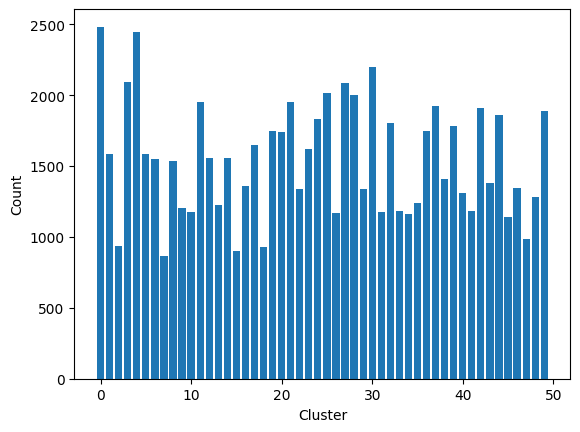

In [64]:
# 문자열 데이터를 숫자로 변환하기 위해 LabelEncoder 사용
label_encoder = LabelEncoder()
product_df_encoded = product_df.copy()  # 변환된 데이터프레임 복사본 생성

# 모든 열에 대해 LabelEncoder 적용
for column in product_df_encoded.columns:
    product_df_encoded[column] = label_encoder.fit_transform(product_df_encoded[column])

# 클러스터링에 사용할 열 선택
features = ['hashed_ip', 'request_url_endpoint']

# 클러스터링 모델 생성
kmeans = KMeans(n_clusters=50)

# 선택한 열로 클러스터링 수행
kmeans.fit(product_df_encoded[features])

# 클러스터링 결과 확인
cluster_labels = kmeans.labels_
product_df_encoded['cluster'] = cluster_labels

# 클러스터 빈도수 계산
cluster_counts = product_df_encoded['cluster'].value_counts().sort_index()

# 막대 그래프로 시각화
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()